# librosa 문제 해결
 - pip install 로 설치했던 librosa 삭제 
 - `conda install -c conda-forge librosa`로 재설치 [librosa Official](https://librosa.org/)

## import

In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd

# https://github.com/matplotlib/matplotlib/issues/25506
# import maplitlib Before import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio
from matplotlib.patches import Rectangle

import librosa
import librosa.display
import IPython.display as ipd

# import matplotlib.pyplot as plt
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T


In [2]:
# import transformers
# import lightning as L
# print(torch.cuda.is_available())
# torch.__version__, transformers.__version__, L.__version__

## Load Data

In [3]:
df = pd.read_csv('./train_mls_en.csv')
print(df.shape)
df.head()

(10808037, 6)


,file_id,speaker_id,chapter_id,utterance_id,sentence,audio_path
0,100_2315_000000,100,2315,0,come let's go said trot again so they left the...,/data/speech-data/mls/mls_english_opus/train/a...
1,100_2315_000001,100,2315,1,indeed the sea devils had crept upon them and ...,/data/speech-data/mls/mls_english_opus/train/a...
2,100_2315_000002,100,2315,2,once in a while one of those crowded out of pl...,/data/speech-data/mls/mls_english_opus/train/a...
3,100_2315_000003,100,2315,3,sacho's thin little legs trotted through the w...,/data/speech-data/mls/mls_english_opus/train/a...
4,100_2315_000004,100,2315,4,here reclined queen aquareine a being so lovel...,/data/speech-data/mls/mls_english_opus/train/a...


In [ ]:
## Split for practice or experiments
train_part_20k = df[:20000].reset_index(drop = True)
# print(train_part_20k.shape) ## Check Shape

## SAVE
train_part_20k.to_csv('./train_part_20k.csv', index = False)
# print(f"{train_part_20k.shape}.csv SAVED")
# PATH: /home/heiscold/prac/train_part_20k.csv

In [11]:
!pwd

/home/heiscold/prac


## torchaudio Test

In [5]:
sample_rate = 22050

In [6]:
idx = 1234567
audio_path = df.audio_path.values[idx]
sentence = df.sentence.values[idx]

print(f"Audio Path: {audio_path}")
print(f"SENTENCE: {sentence}")

# audio, sr  = librosa.load(audio_path, sr=None)
audio, sr  = torchaudio.load(audio_path,)
## returned sr is 'orig_sr' of sound
print("ORIGINAL SAMPLE RATE: ", sr)
print("TARGET SAMPLE RATE", sample_rate)

## SAMPLE
# audio = librosa.resample(audio, orig_sr= sr, target_sr= sample_rate )
resample = torchaudio.transforms.Resample(orig_freq=sr, new_freq=sample_rate,)
audio = resample(audio)
ipd.display(ipd.Audio(audio, rate = sample_rate))

Audio Path: /data/speech-data/mls/mls_english_opus/train/audio/11305/11284/11305_11284_000055.opus
SENTENCE: no said polly she didn't because you see it wouldn't have done any good she'd got to think up things how to get out and all that you know so there wasn't any time to cry and she spoke up just as soon as she could catch her breath
ORIGINAL SAMPLE RATE:  48000
TARGET SAMPLE RATE 22050


## librosa Test

In [7]:
idx = 1234567
audio_path = df.audio_path.values[idx]
sentence = df.sentence.values[idx]

print(f"Audio Path: {audio_path}")
print(f"SENTENCE: {sentence}")


audio, sr  = librosa.load(audio_path, sr=None)
# audio, sr  = torchaudio.load(audio_path,)
# returned sr is 'orig_sr' of sound
print("ORIGINAL SAMPLE RATE: ", sr)
print("TARGET SAMPLE RATE", sample_rate)

## SAMPLE
audio = librosa.resample(audio, orig_sr= sr, target_sr= sample_rate )
# resample = torchaudio.transforms.Resample(orig_freq=sr, new_freq=sample_rate,)
# audio = resample(audio)
ipd.display(ipd.Audio(audio, rate = sample_rate))

Audio Path: /data/speech-data/mls/mls_english_opus/train/audio/11305/11284/11305_11284_000055.opus
SENTENCE: no said polly she didn't because you see it wouldn't have done any good she'd got to think up things how to get out and all that you know so there wasn't any time to cry and she spoke up just as soon as she could catch her breath
ORIGINAL SAMPLE RATE:  16000
TARGET SAMPLE RATE 22050


## Spectrogram & Others
 [torchaudio tutorial 'audio extraction'](https://pytorch.org/audio/main/tutorials/audio_feature_extractions_tutorial.html#sphx-glr-tutorials-audio-feature-extractions-tutorial-py)

In [8]:
# https://pytorch.org/audio/main/tutorials/audio_feature_extractions_tutorial.html#sphx-glr-tutorials-audio-feature-extractions-tutorial-py


def plot_waveform(waveform, sr, title="Waveform", ax=None):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sr

    if ax is None:
        _, ax = plt.subplots(num_channels, 1)
    ax.plot(time_axis, waveform[0], linewidth=1)
    ax.grid(True)
    ax.set_xlim([0, time_axis[-1]])
    ax.set_title(title)


def plot_spectrogram(specgram, title=None, ylabel="freq_bin", ax=None):
    if ax is None:
        _, ax = plt.subplots(1, 1)
    if title is not None:
        ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto", interpolation="nearest")


def plot_fbank(fbank, title=None):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Filter bank")
    axs.imshow(fbank, aspect="auto")
    axs.set_ylabel("frequency bin")
    axs.set_xlabel("mel bin")


### Spectrogram

Audio Path: /data/speech-data/mls/mls_english_opus/train/audio/11305/11284/11305_11284_000055.opus
SENTENCE: no said polly she didn't because you see it wouldn't have done any good she'd got to think up things how to get out and all that you know so there wasn't any time to cry and she spoke up just as soon as she could catch her breath
ORIGINAL SAMPLE RATE:  48000
TARGET SAMPLE RATE 22050


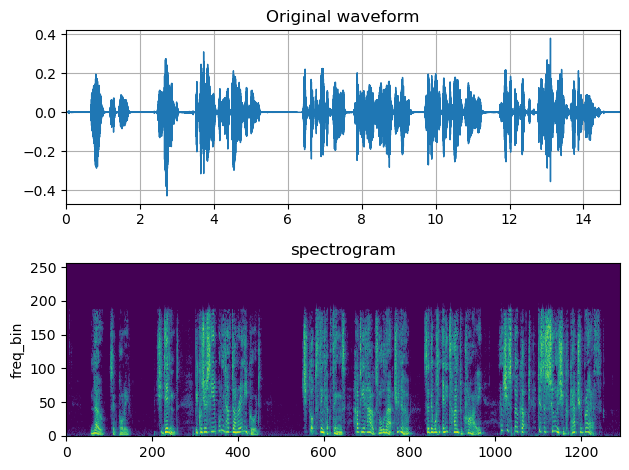

In [9]:
fig, axs = plt.subplots(2, 1)

idx = 1234567
audio_path = df.audio_path.values[idx]
sentence = df.sentence.values[idx]

print(f"Audio Path: {audio_path}")
print(f"SENTENCE: {sentence}")

# audio, sr  = librosa.load(audio_path, sr=None)
audio, sr  = torchaudio.load(audio_path,)
## returned sr is 'orig_sr' of sound
print("ORIGINAL SAMPLE RATE: ", sr)
print("TARGET SAMPLE RATE", sample_rate)

## SAMPLE
# audio = librosa.resample(audio, orig_sr= sr, target_sr= sample_rate )
resample = torchaudio.transforms.Resample(orig_freq=sr, new_freq=sample_rate,)
audio = resample(audio)
spectrogram = T.Spectrogram(n_fft=512)
spec = spectrogram(audio)

plot_waveform(audio, sample_rate, title="Original waveform", ax=axs[0])
plot_spectrogram(spec[0], title="spectrogram", ax=axs[1])
fig.tight_layout()

In [10]:
Audio(audio.numpy(), rate=sample_rate)